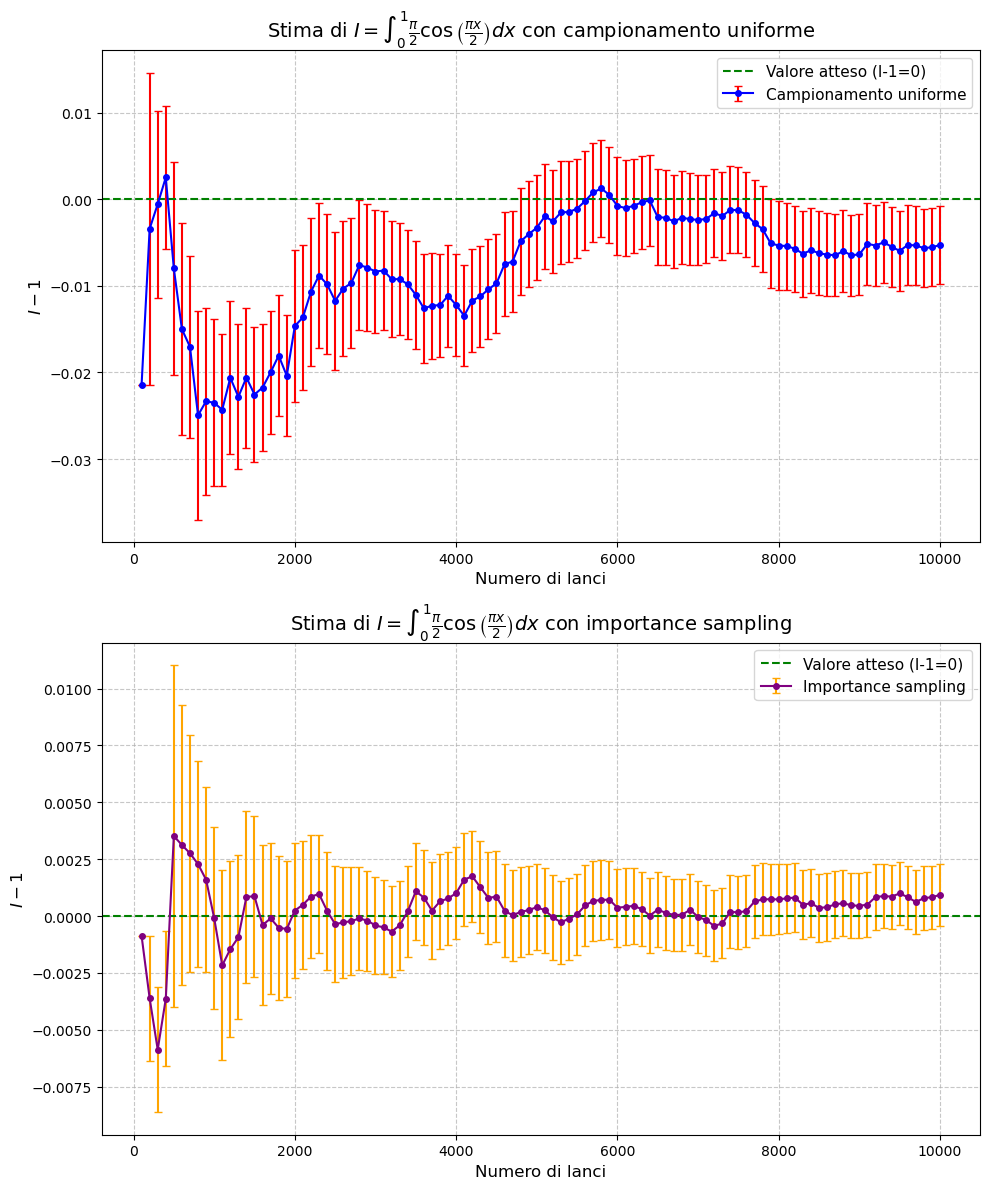

In [1]:
import numpy as np  # Importa la libreria per operazioni numeriche efficienti
import matplotlib.pyplot as plt  # Importa la libreria per la creazione di grafici

# CARICAMENTO DATI
# ================

# Funzione: np.loadtxt()
# Scopo: Caricare dati da file di testo in array NumPy
# Parametri: Nome file, struttura dati (3 colonne in questo caso)
data1 = np.loadtxt("Es02.1unif.txt")  # Carica dati per campionamento uniforme
data2 = np.loadtxt("Es02.1nonunif.txt")  # Carica dati per importance sampling

# ESTRAZIONE DATI
# ===============

# Per campionamento uniforme:
n_throws1 = data1[:, 0]      # Colonna 0: numero cumulativo di lanci
r_minus_half1 = data1[:, 1]  # Colonna 1: valore stimato (I - 1)
uncertainty1 = data1[:, 2]   # Colonna 2: incertezza statistica

# Per importance sampling:
n_throws2 = data2[:, 0]      # Colonna 0: numero cumulativo di lanci
r_minus_half2 = data2[:, 1]  # Colonna 1: valore stimato (I - 1)
uncertainty2 = data2[:, 2]   # Colonna 2: incertezza statistica

# CREAZIONE FIGURA
# ================

# Funzione: plt.figure()
# Scopo: Creare una nuova figura per i grafici
# Parametri: figsize=(larghezza, altezza) in pollici
plt.figure(figsize=(10, 12))  # Dimensioni adatte per due grafici verticali

# PRIMO SUBPLOT: CAMPIONAMENTO UNIFORME
# =====================================

# Funzione: plt.subplot()
# Scopo: Creare il primo di due grafici verticali (2 righe, 1 colonna, posizione 1)
plt.subplot(2, 1, 1)

# Funzione: plt.errorbar()
# Scopo: Creare un grafico con barre d'errore
# Parametri:
#   n_throws1: valori x (numero di lanci)
#   r_minus_half1: valori y (stima I-1)
#   yerr=uncertainty1: ampiezze barre d'errore verticali
#   fmt='o-': formato punti cerchiati con linea continua
#   markersize=4: dimensione dei marcatori
#   capsize=3: dimensione delle estremità delle barre d'errore
#   color='blue': colore della linea e dei punti
#   ecolor='red': colore delle barre d'errore
#   label: etichetta per la legenda
plt.errorbar(
    n_throws1, 
    r_minus_half1, 
    yerr=uncertainty1, 
    fmt='o-', 
    markersize=4,
    capsize=3,
    color='blue',
    ecolor='red',
    label='Campionamento uniforme'
)

# Funzione: plt.axhline()
# Scopo: Aggiungere una linea orizzontale di riferimento a y=0
# Parametri:
#   y=0: valore sull'asse y
#   color='green': colore della linea
#   linestyle='--': stile tratteggiato
#   label: etichetta per la legenda
plt.axhline(y=0, color='green', linestyle='--', label='Valore atteso (I-1=0)')

# Configurazione assi e titolo
plt.xlabel("Numero di lanci", fontsize=12)  # Etichetta asse x
plt.ylabel(r'$I - 1$', fontsize=12)  # Etichetta asse y (formula matematica LaTeX)
plt.title(r"Stima di $I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right)dx$ con campionamento uniforme", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Griglia tratteggiata semi-trasparente
plt.legend(fontsize=11)  # Visualizza legenda con dimensioni carattere

# SECONDO SUBPLOT: IMPORTANCE SAMPLING
# ====================================

plt.subplot(2, 1, 2)  # Secondo grafico in posizione 2

plt.errorbar(
    n_throws2, 
    r_minus_half2, 
    yerr=uncertainty2, 
    fmt='o-', 
    markersize=4,
    capsize=3,
    color='purple',
    ecolor='orange',
    label='Importance sampling'
)
plt.axhline(y=0, color='green', linestyle='--', label='Valore atteso (I-1=0)')
plt.xlabel("Numero di lanci", fontsize=12)
plt.ylabel(r'$I - 1$', fontsize=12)
plt.title(r"Stima di $I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right)dx$ con importance sampling", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)

# OTTIMIZZAZIONE E VISUALIZZAZIONE
# ================================

# Funzione: plt.tight_layout()
# Scopo: Ottimizza automaticamente gli spazi tra i subplot
plt.tight_layout()

# Funzione: plt.show()
# Scopo: Visualizza la figura completa
plt.show()

## Analisi della stima dell'integrale con metodi Monte Carlo

Il grafico mostra la stima dell'integrale $I = \int_0^1 \frac{\pi}{2}\cos\left(\frac{\pi x}{2}\right)dx$ (meno il suo valore vero 1) utilizzando due diverse tecniche di campionamento. Ecco le principali osservazioni:

### 📊 Confronto tra i metodi
- **Campionamento uniforme (grafico superiore)**:
  - La convergenza al valore vero (I-1=0) è lenta e presenta oscillazioni significative
  - L'incertezza  diminuisce lentamente con l'aumentare dei lanci


- **Importance sampling (grafico inferiore)**:
  - Convergenza molto più rapida e stabile verso il valore vero
  - Oscillazioni ridotte già con pochi lanci
  - Incertezza significativamente minore a parità di lanci



### ⚙️ Teoria alla base dell'importance sampling
L'integrale viene riscritto come:
$$I = \int_0^1 f(x)dx = \int_0^1 \frac{f(x)}{p(x)} p(x)dx$$
dove:
- $f(x) = \frac{\pi}{2}\cos(\pi x/2)$
- $p(x)$ è la nuova distribuzione di probabilità dove $p(x)=2(1 - x)$

La stima Monte Carlo diventa:
$$I \approx \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)}$$
con $x_i$ campionati da $p(x)$

### 💡 Conclusioni
1. **Efficienza**:
   L'importance sampling riduce drasticamente il numero di campioni necessario per ottenere una buona stima.

2. **Scelta della distribuzione**:
   La distribuzione ottimale sarebbe $p(x) \propto |f(x)|$, ma qualsiasi scelta che assomigli all'integranda migliora l'efficienza.

3. **Varianza ridotta**:
   Questo metodo è particolarmente utile quando l'integranda varia fortemente nell'intervallo di integrazione.